# Conexão com postgres e Relatorios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

### Importando bibliotecas

In [0]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2


In [0]:
### Usando psycopg2 para configurar conexão

In [0]:
conn = psycopg2.connect(host="elmer.db.elephantsql.com",database="ftraczzx", user="ftraczzx", password="olxVdZ2hyXhG1r3tK6oHCghMdefy4imh")

## Obtendo dados do database com Pandas

# Relatório 1

### Obejtivo: Exibir quais espécies de peixes estão em quais tanques no momento atual e o tipo da água

In [0]:
tanque = pd.read_sql_query("""
                           select idtanque, nomecientifico, tipoagua
                           from tanque 
                           inner join peixe on(tanque.fk_peixe_idpeixe = peixe.idpeixe) 
                           where idtanque <> 0;
                          """,conn)
tanque

,idtanque,nomecientifico,tipoagua
0,1,tilapia,doce
1,2,dourado,doce
2,3,tilapia,doce
3,4,dourado,doce
4,5,tilapia,doce
5,7,none,none


# Relatorio 2

### Objetivo: Mostrar estado atual de um tanque e quais dados  estão fora do esperado

In [0]:
tanque = pd.read_sql_query("""
                           select * from tanque 
                           inner join peixe on(tanque.fk_peixe_idpeixe=peixe.idpeixe)
                           where idtanque <> 0;
                           
                          """,conn)
tanque

,idtanque,temperatura,ph,oxigenio,fk_peixe_idpeixe,idpeixe,nomecientifico,tipoagua,tempmin,tempmax,phmin,phmax,oxmin,oxmax
0,1,30.5,6.2,7.2,1,1,tilapia,doce,27.0,32.0,6.0,8.5,5.0,10.0
1,2,30.4,6.9,5.5,2,2,dourado,doce,22.0,28.0,6.5,8.0,4.0,10.0
2,3,30.1,6.9,6.2,1,1,tilapia,doce,27.0,32.0,6.0,8.5,5.0,10.0
3,4,30.3,6.8,6.3,2,2,dourado,doce,22.0,28.0,6.5,8.0,4.0,10.0
4,5,30.5,7.2,7.1,1,1,tilapia,doce,27.0,32.0,6.0,8.5,5.0,10.0
5,7,0.0,0.0,0.0,0,0,none,none,0.0,0.0,0.0,0.0,0.0,0.0


# Relatorio 3

### Objetivo: Mostrar quais funcionários estão responsáveis por quais tanques

In [0]:
result3 = pd.read_sql_query("""SELECT nome as funcionario,idtanque as tanque
                              FROM  funcionario inner join tanque on(tanque.idtanque=funcionario.fk_tanque_idtanque)
                              where idtanque!=0;                          
                          """,conn);
result3

,funcionario,tanque
0,marcelo,1
1,gandalf,2
2,andre,3
3,joaquim,4
4,bilbo,5
5,boromir,1
6,aragorn,2
7,legolas,3
8,tauriel,4
9,frodo,5


# Relatório 4

### Obejtivo: Exibir histórico dos tanques com base nos funcionários

In [0]:
result = pd.read_sql_query("""SELECT nome, cpf, idtanque, medicao.temperatura, medicao.ph, medicao.oxigenio, nomecientifico, tipoagua, hora, data
                          FROM  funcionario 
                          inner join tanque on(tanque.idtanque = funcionario.fk_tanque_idtanque)
                          inner join peixe on(tanque.fk_peixe_idpeixe = peixe.idpeixe)
                          inner join medicao on(medicao.fk_tanque_idtanque = tanque.idtanque)
                          where (fk_turno_idturno = 1) 
                          order by(hora, data);
                          """,conn);
result

,nome,cpf,idtanque,temperatura,ph,oxigenio,nomecientifico,tipoagua,hora,data
0,joaquim,12331622510,4,33.0,7.0,8.6,dourado,doce,08:30:00,2018-01-28
1,marcelo,14730683714,1,34.0,7.5,8.9,tilapia,doce,08:30:00,2018-01-28
2,bilbo,98753612345,5,34.0,7.5,8.9,tilapia,doce,08:30:00,2018-01-28
3,gandalf,74731683511,2,33.0,7.0,8.6,dourado,doce,08:30:00,2018-01-28
4,andre,71131683510,3,34.0,7.5,8.9,tilapia,doce,08:30:00,2018-01-28
5,joaquim,12331622510,4,33.1,7.1,8.8,dourado,doce,09:30:00,2018-01-28
6,andre,71131683510,3,34.1,7.6,8.8,tilapia,doce,09:30:00,2018-01-28
7,gandalf,74731683511,2,33.1,7.1,8.8,dourado,doce,09:30:00,2018-01-28
8,bilbo,98753612345,5,34.1,7.6,8.8,tilapia,doce,09:30:00,2018-01-28
9,marcelo,14730683714,1,34.1,7.6,8.8,tilapia,doce,09:30:00,2018-01-28


# Relatório 5 

### Objetivo: Mostrar dados de informações de contato dos funcionários

In [0]:
result =pd.read_sql_query("""
                SELECT nome,cpf,cidade,bairro,logradouro,cep,dado as telefone 
                FROM  funcionario inner join endereco on (endereco.fk_funcionario_idfuncionario = funcionario.idfuncionario)
                inner join contato on(contato.fk_funcionario_idfuncionario = funcionario.idfuncionario)
                where fk_tipocontato_idtipo = 2;
                            """,conn)
result

,nome,cpf,cidade,bairro,logradouro,cep,telefone
0,marcelo,14730683714,vila velha,soteco,rua visconde de taunay,29106080,33394433
1,gandalf,74731683511,vila velha,cocal,rua cravos verdes,29106090,33393191
2,andre,71131683510,vila velha,cocal,rua laranja mecanica,29106100,33323987
3,joaquim,12331622510,vila velha,soteco,rua dos alfaiates,29106110,33393123
4,bilbo,98753612345,middle earth,cocal,rua ponei saltitante,29106111,33393789
5,lucca,98753612655,vila velha,itapua,rua abacate doce,29106101,32569874
6,boromir,24730683714,middle earth,harehal,rua dos alfaiates,29106111,32569811
7,aragorn,23731683511,middle earth,condado,rua ponei saltitante,29106121,33304499
8,legolas,32131683510,middle earth,harehal,rua dos alfaiates,29106111,30334148
9,tauriel,32331622510,middle earth,condado,rua ponei saltitante,29106121,38985689


# Relatório 6 


### Objetivo: Exibir histórico de oxigênio e ph do tanque em certa data

In [0]:
result6 = pd.read_sql_query("""SELECT medicao.ph, medicao.oxigenio, hora, data
                          FROM  medicao 
                          where (medicao.fk_tanque_idtanque=1 and data='2018-01-28') 
                          order by(hora, data);
                          """,conn);
result6





,ph,oxigenio,hora,data
0,7.5,8.9,08:30:00,2018-01-28
1,7.6,8.8,09:30:00,2018-01-28
2,7.7,8.7,10:30:00,2018-01-28
3,7.8,8.7,11:30:00,2018-01-28
4,7.9,8.5,12:30:00,2018-01-28


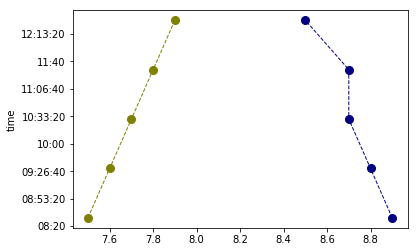

In [0]:
import matplotlib.pyplot as plt
df = pd.DataFrame(result6)


plt.plot(df.oxigenio, df.hora, 'bo',  linestyle='dashed', color = 'navy', linewidth=1, markersize=8) 
plt.plot(df.ph, df.hora, 'bo', linestyle='dashed',  color = 'olive', linewidth=1, markersize=8)

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>